In [1]:
#utils check 
import utils_updated
from rnn import processText

#import packages
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
data = pd.read_csv('../data/papers.csv')
data.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [3]:
# #preprocessing
dataNew = utils_updated.preprocessing(data)
#drop na in data
dataRNA = dataNew.dropna(subset = ['abstract'])
#check data
dataRNA.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,self-organization of associative database and ...,NaN,1-self-organization-of-associative-database-an...,an efficient method of self-organizing associa...,767 self-organization of associative database...
1,10,1987,a mean field theory of layer iv of visual cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,a single cell theory for the development of se...,683 a mean field theory of layer iv of visual...
2,100,1988,storing covariance by the associative long-ter...,NaN,100-storing-covariance-by-the-associative-long...,in modeling studies or memory based on neural...,394 storing covariance by the associative lon...
3,1000,1994,bayesian query construction for neural network...,NaN,1000-bayesian-query-construction-for-neural-ne...,"if data collection is costly, there is much to...",bayesian query construction for neural network...
4,1001,1994,"neural network ensembles, cross validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,learning of continuous valued functions using ...,"neural network ensembles, cross validation, an..."


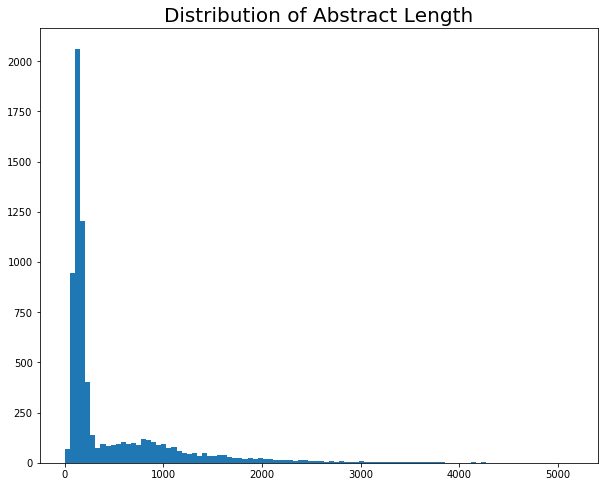

In [4]:
#check distribution of length in abstract
aLen = list()
for a in dataRNA.abstract:
    try:
        a = a.replace('\n', ' ')
        a = a.split(' ')
        aLen.append(len(a))
    except:
        aLen = aLen
#visualize distribution 
fig, ax = plt.subplots(figsize = (10, 8))
ax.hist(aLen, bins = 100)
ax.set_title('Distribution of Abstract Length', fontsize = 20)
plt.show()

In [5]:
#rnn tokenization prep
prep = processText(dataRNA[['title', 'abstract']].values.T)
prepVec = prep.tokenize()

In [6]:
#check shape of vectors
prepVec.shape

(2, 7174)

In [8]:
#check common words
prep.mostCommon().most_common(100)

[('the', 211414),
 ('of', 121536),
 ('a', 90472),
 ('to', 72499),
 ('and', 70136),
 ('in', 66278),
 ('is', 55928),
 ('for', 39242),
 ('we', 38669),
 ('that', 36214),
 ('this', 24649),
 ('are', 23096),
 ('with', 22810),
 ('by', 22536),
 ('as', 22380),
 ('on', 22001),
 ('be', 20482),
 ('an', 17673),
 ('can', 15269),
 ('from', 14601),
 ('which', 14391),
 ('learning', 12313),
 ('model', 12041),
 ('it', 10881),
 ('our', 10166),
 ('data', 9443),
 ('or', 8372),
 ('each', 8289),
 ('have', 7789),
 ('algorithm', 7772),
 ('at', 7725),
 ('these', 7257),
 ('such', 7239),
 ('using', 7226),
 ('not', 6961),
 ('has', 6736),
 ('set', 6681),
 ('where', 6608),
 ('one', 6411),
 ('function', 6168),
 ('two', 6051),
 ('problem', 6026),
 ('between', 6001),
 ('models', 5491),
 ('network', 5449),
 ('neural', 5438),
 ('number', 5398),
 ('used', 5228),
 ('all', 5144),
 ('given', 5062),
 ('training', 4952),
 ('more', 4952),
 ('show', 4928),
 ('if', 4867),
 ('based', 4793),
 ('also', 4689),
 ('over', 4682),
 ('been'

In [9]:
print('Number of unique words: ', prep.nUnique)
print('Maxmimum sequence length: ', prep.maxLen)

Number of unique words:  110654
Maxmimum sequence length:  5145
